### Instalar y cargar paquetes

In [58]:
if (!require("pacman")) install.packages("pacman") # si es necesario instalamos pacman
pacman::p_load(pacman, magrittr, productplots, psych, 
  RColorBrewer, tidyverse)

<ul>
<li> pacman: para cargar/descargar paquetes</li>
<li> magrittr: para pipes</li>
<li> productplots: para conjunto de datos de muestra "happy"</li>
<li> psych: para procedimientos estadísticos</li>
<li> RColorBrewer: para paletas de colores</li>
<li> tidyverse: por diferentes motivos</li>
</ul>    

### Cargar y preparacion de los datos

In [59]:
?happy # vemos que dice la documentacion del dataset
names(happy)

[1] "id"      "happy"   "year"    "age"     "sex"     "marital" "degree" 
 [8] "finrela" "health"  "wtssall"

happy {productplots},R Documentation


##### vemos un poco la estructura del dataset

In [60]:
cat('Cantidad de columnas:', ncol(happy), '\n')
cat('Cantidad de filas:', nrow(happy), '\n')

Cantidad de columnas: 10 
Cantidad de filas: 51020 


##### un resumen de los datos
##### podemos observar algunos detalles:
<ul>
<li>hay 3 niveles de "happy" (not to happy, pretty happy, very happy)</li>
<li>en happy tenemos 4717 valores nulos (un 9,2%)</li>
<li>en edad hay 184 valores nulos</li>
<li>hay muchos nulos en health</li>    
</ul>

In [61]:
summary(happy)

       id                 happy            year           age       
 Min.   :   1   not too happy: 5629   Min.   :1972   Min.   :18.00  
 1st Qu.: 491   pretty happy :25874   1st Qu.:1982   1st Qu.:31.00  
 Median :1002   very happy   :14800   Median :1990   Median :43.00  
 Mean   :1146   NA's         : 4717   Mean   :1990   Mean   :45.43  
 3rd Qu.:1504                         3rd Qu.:2000   3rd Qu.:58.00  
 Max.   :4510                         Max.   :2006   Max.   :89.00  
                                                     NA's   :184    
     sex                 marital                 degree     
 male  :22439   married      :27998   lt high school:11777  
 female:28581   never married:10064   high school   :26307  
                divorced     : 6131   junior college: 2601  
                widowed      : 5032   bachelor      : 6918  
                separated    : 1781   graduate      : 3253  
                NA's         :   14   NA's          :  164  
                     

##### vamos a guardarlo como un tibble()

In [62]:
df <- happy %>%
  as_tibble() %>%
  print()

# A tibble: 51,020 × 10
      id happy          year   age sex    marital  degree finrela health wtssall
   <dbl> <fct>         <dbl> <dbl> <fct>  <fct>    <fct>  <fct>   <fct>    <dbl>
 1     1 not too happy  1972    23 female never m… bache… average good     0.445
 2     2 not too happy  1972    70 male   married  lt hi… above … fair     0.889
 3     3 pretty happy   1972    48 female married  high … average excel…   0.889
 4     4 not too happy  1972    27 female married  bache… average good     0.889
 5     5 pretty happy   1972    61 female married  high … above … good     0.889
 6     6 pretty happy   1972    26 male   never m… high … above … good     0.445
 7     7 not too happy  1972    28 male   divorced high … above … excel…   0.445
 8     8 not too happy  1972    27 male   never m… bache… average good     0.445
 9     9 pretty happy   1972    21 female never m… high … average excel…   0.445
10    10 pretty happy   1972    30 female married  high … below … fair     0.889
# ℹ 

##### eliminamos id y wtssall, que es una variable de ponderación que no cambia apreciablemente los resultados.

In [63]:
df %<>%
  select(happy:health) %>%
  print()

# A tibble: 51,020 × 8
   happy          year   age sex    marital       degree         finrela  health
   <fct>         <dbl> <dbl> <fct>  <fct>         <fct>          <fct>    <fct> 
 1 not too happy  1972    23 female never married bachelor       average  good  
 2 not too happy  1972    70 male   married       lt high school above a… fair  
 3 pretty happy   1972    48 female married       high school    average  excel…
 4 not too happy  1972    27 female married       bachelor       average  good  
 5 pretty happy   1972    61 female married       high school    above a… good  
 6 pretty happy   1972    26 male   never married high school    above a… good  
 7 not too happy  1972    28 male   divorced      high school    above a… excel…
 8 not too happy  1972    27 male   never married bachelor       average  good  
 9 pretty happy   1972    21 female never married high school    average  excel…
10 pretty happy   1972    30 female married       high school    below a… fair  
# ℹ 5

In [64]:
levels(df$happy)

[1] "not too happy" "pretty happy"  "very happy"

### Variable de resultado: happy

#### Grafico de barras de "happy"

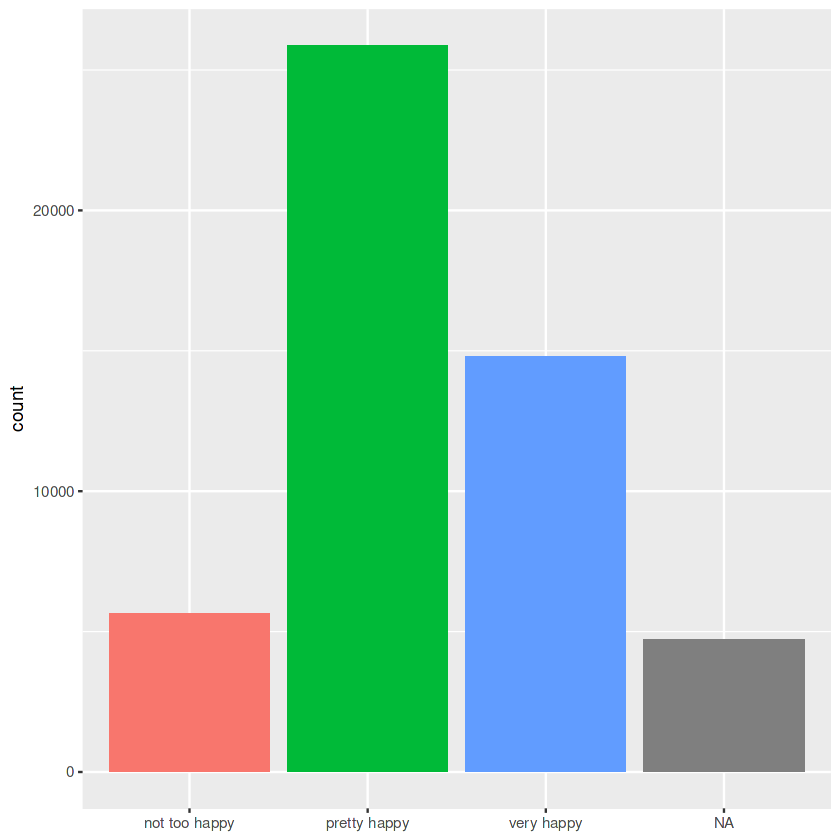

In [65]:
df %>%
  ggplot() + 
  geom_bar(aes(happy, fill = happy)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

#### Frecuencias de "happy"

In [66]:
df %>% count(happy)

happy,n
<fct>,<int>
not too happy,5629
pretty happy,25874
very happy,14800
NA,4717


##### sacamos los NAs y calculamos de nuevo

In [67]:
df %<>%
  filter(!is.na(happy))
df %>% count(happy) %>%
mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))

happy,n,percentage
<fct>,<int>,<chr>
not too happy,5629,12 %
pretty happy,25874,56 %
very happy,14800,32 %


### Felicidad y genero

#### Grafico de barras por sexo

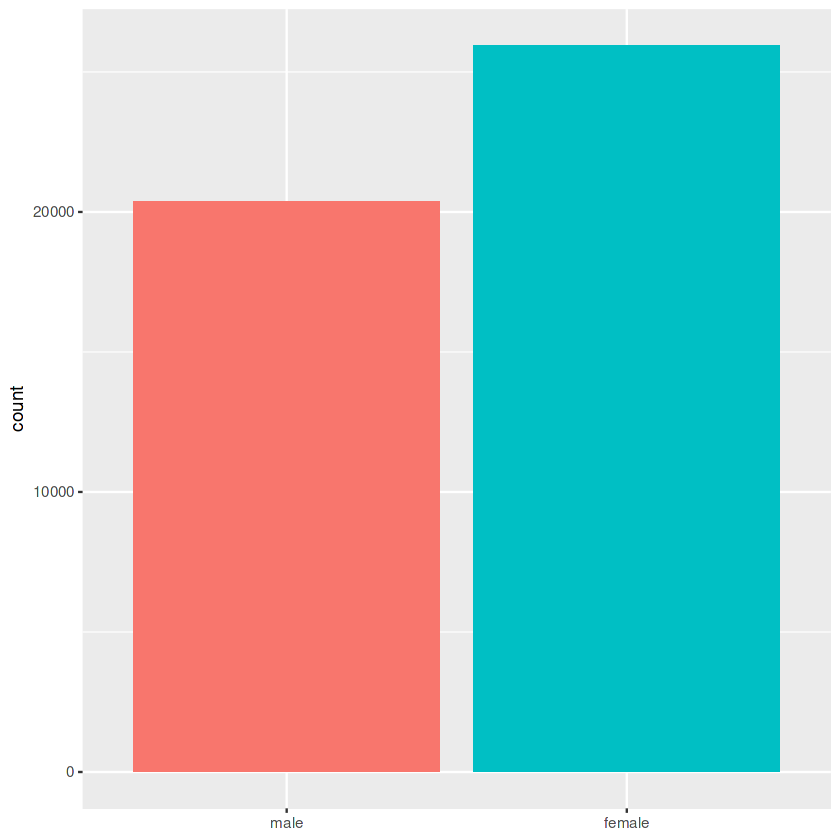

In [68]:
df %>%
  ggplot() + 
  geom_bar(aes(sex, fill = sex)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

#### Frecuencias por sexo

In [69]:
df %>%
  count(sex) %>%
  mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))

sex,n,percentage
<fct>,<int>,<chr>
male,20357,44 %
female,25946,56 %


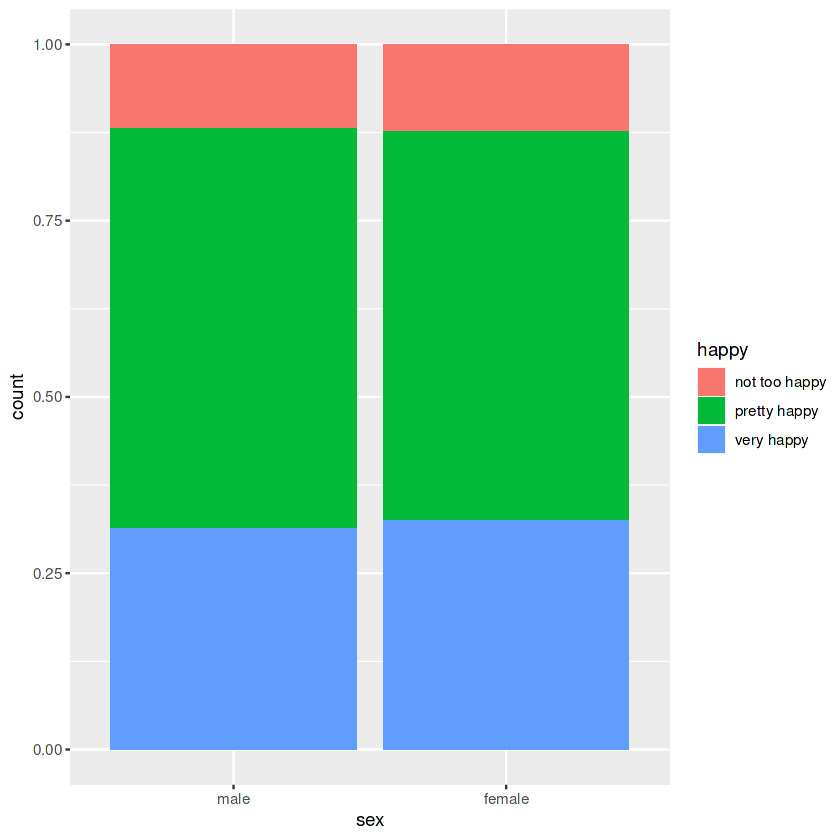

In [70]:
df %>%
  ggplot(aes(sex, fill = happy)) + 
  geom_bar(position = "fill")

##### viendo en un grafico de barras apiladas se observan muy similares

### Felicidad y Estado Civil

#### Grafico de barras de estado civil

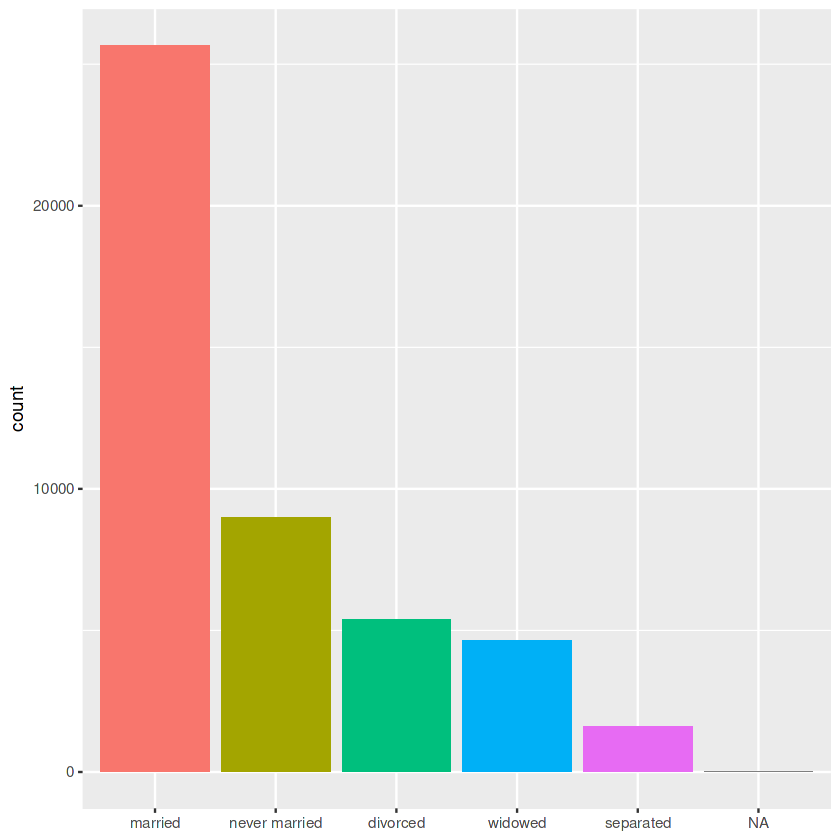

In [71]:
df %>%
  ggplot() + 
  geom_bar(aes(marital, fill = marital)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

#### Frecuencias de estad civil

In [72]:
df %>% 
count(marital) %>%
mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))

marital,n,percentage
<fct>,<int>,<chr>
married,25662,55 %
never married,8979,19 %
divorced,5385,12 %
widowed,4652,10 %
separated,1618,3 %
NA,7,0 %


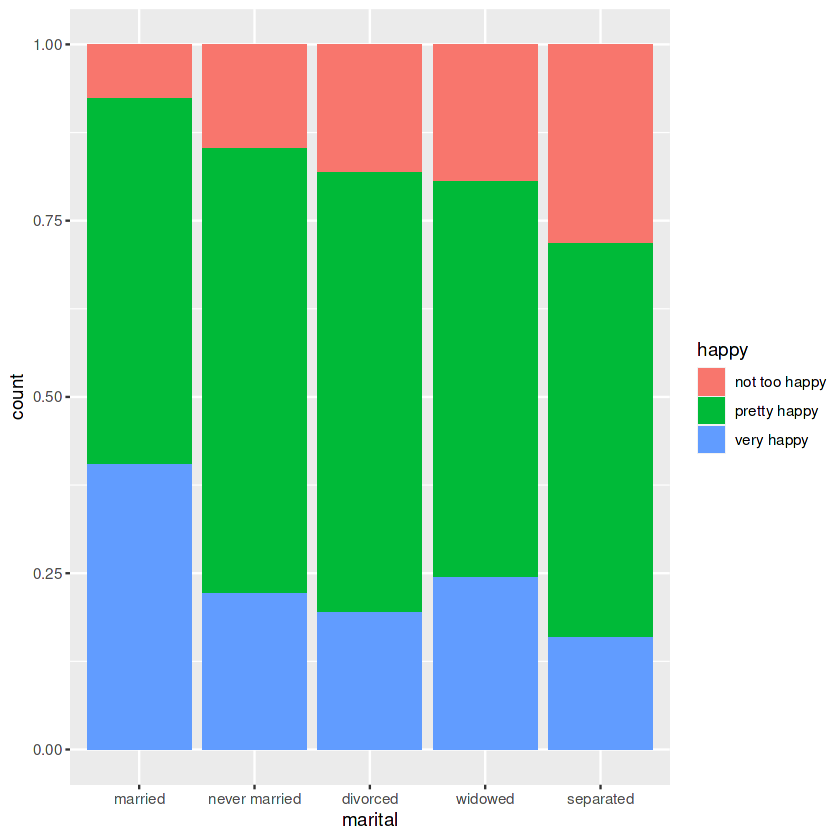

In [73]:
df %>%
  filter(!is.na(marital)) %>%
  ggplot(aes(marital, fill = happy)) + 
  geom_bar(position = "fill")

##### en este grafico de barras apiladas se nota una diferencia acerca de la variable "happy" por estado civil

#### Creamos una variable dicotomica, casado si o no

In [74]:
df %<>%
  mutate(
    married = ifelse(
      marital == "married",
      "yes",
      "no")
  ) %>%
  mutate(married = as.factor(married)) %>%
 print()

# A tibble: 46,303 × 9
   happy          year   age sex    marital       degree  finrela health married
   <fct>         <dbl> <dbl> <fct>  <fct>         <fct>   <fct>   <fct>  <fct>  
 1 not too happy  1972    23 female never married bachel… average good   no     
 2 not too happy  1972    70 male   married       lt hig… above … fair   yes    
 3 pretty happy   1972    48 female married       high s… average excel… yes    
 4 not too happy  1972    27 female married       bachel… average good   yes    
 5 pretty happy   1972    61 female married       high s… above … good   yes    
 6 pretty happy   1972    26 male   never married high s… above … good   no     
 7 not too happy  1972    28 male   divorced      high s… above … excel… no     
 8 not too happy  1972    27 male   never married bachel… average good   no     
 9 pretty happy   1972    21 female never married high s… average excel… no     
10 pretty happy   1972    30 female married       high s… below … fair   yes    
# ℹ 4

In [75]:
df %>% count(married)
df %<>% mutate(married = fct_rev(married))


married,n
<fct>,<int>
no,20634
yes,25662
NA,7


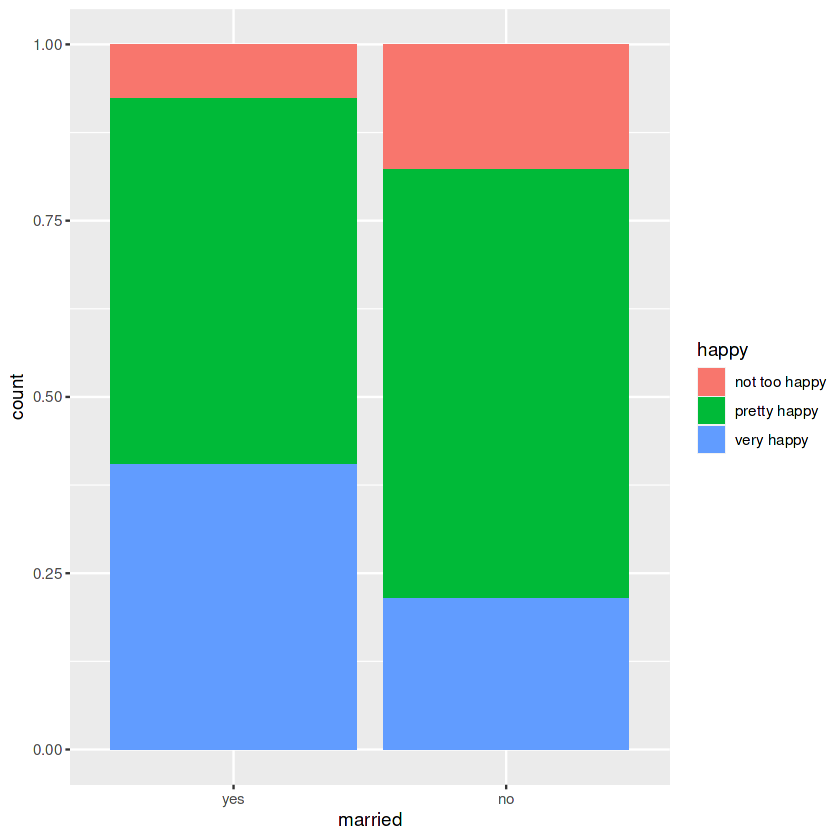

In [76]:
df %>%
  filter(!is.na(married)) %>%
  ggplot(aes(married, fill = happy)) + 
  geom_bar(position = "fill")

##### vemos que los casados son mas felices que los que no, segun este grafico de barras apiladas.

### Felicidad y nivel de educacion

#### Grafico de barras

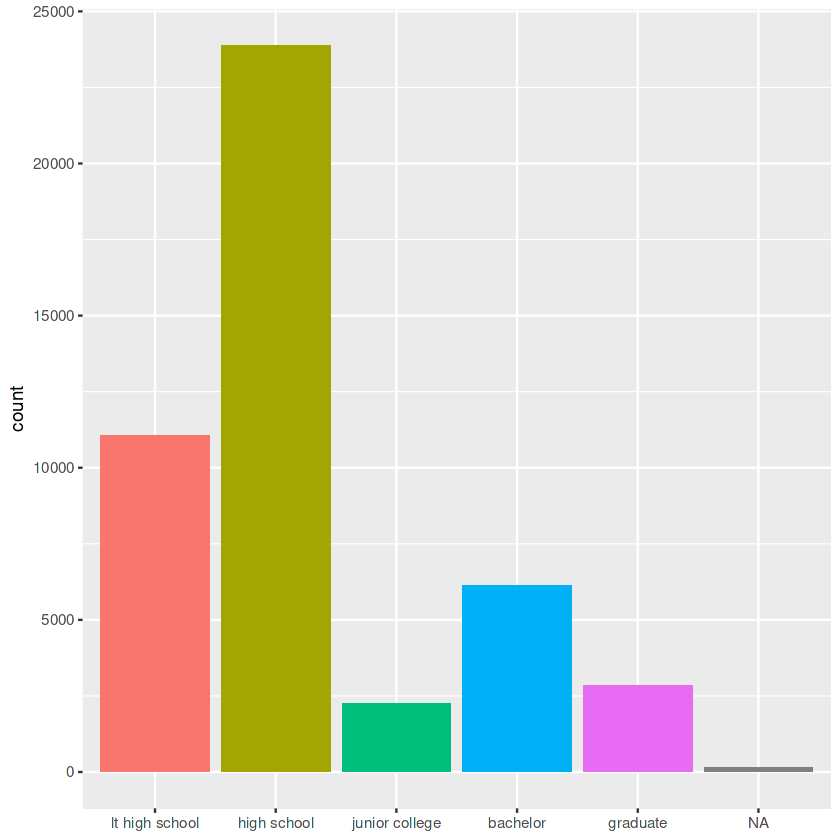

In [77]:
df %>%
  ggplot() + 
  geom_bar(aes(degree, fill = degree)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

#### Frecuencias de nivel de educacion

In [78]:
df %>% 
count(degree) %>% 
arrange(desc(n)) %>%
mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))

degree,n,percentage
<fct>,<int>,<chr>
high school,23880,52 %
lt high school,11053,24 %
bachelor,6134,13 %
graduate,2840,6 %
junior college,2252,5 %
NA,144,0 %


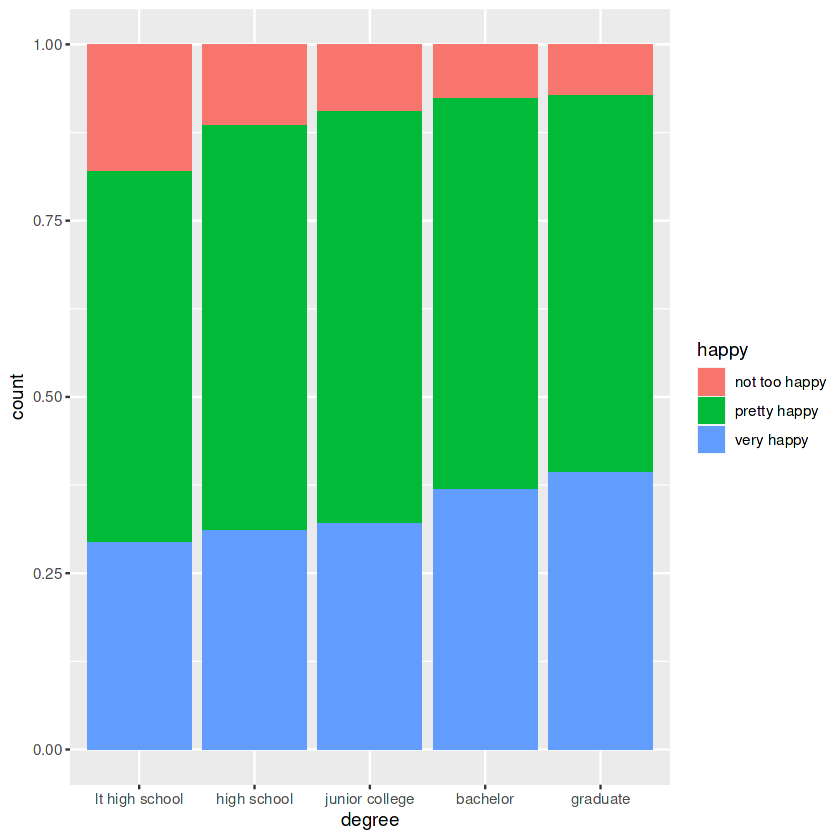

In [79]:
df %>%
  filter(!is.na(degree)) %>%
  ggplot(aes(degree, fill = happy)) + 
  geom_bar(position = "fill")

##### se nota mayor felicidad segun aumenta el nivel de educacion

#### Creamos variable dicotomica entre universitario o no

In [80]:
df %<>%
  mutate(
    college = ifelse(
      degree %in%
      c("junior college",
        "bachelor",
        "graduate"),
      "yes", "no")
  ) %>%
  print()

# A tibble: 46,303 × 10
   happy          year   age sex   marital degree finrela health married college
   <fct>         <dbl> <dbl> <fct> <fct>   <fct>  <fct>   <fct>  <fct>   <chr>  
 1 not too happy  1972    23 fema… never … bache… average good   no      yes    
 2 not too happy  1972    70 male  married lt hi… above … fair   yes     no     
 3 pretty happy   1972    48 fema… married high … average excel… yes     no     
 4 not too happy  1972    27 fema… married bache… average good   yes     yes    
 5 pretty happy   1972    61 fema… married high … above … good   yes     no     
 6 pretty happy   1972    26 male  never … high … above … good   no      no     
 7 not too happy  1972    28 male  divorc… high … above … excel… no      no     
 8 not too happy  1972    27 male  never … bache… average good   no      yes    
 9 pretty happy   1972    21 fema… never … high … average excel… no      no     
10 pretty happy   1972    30 fema… married high … below … fair   yes     no     
# ℹ 

In [81]:
df %>% count(college) %>% mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))

college,n,percentage
<chr>,<int>,<chr>
no,35077,76 %
yes,11226,24 %


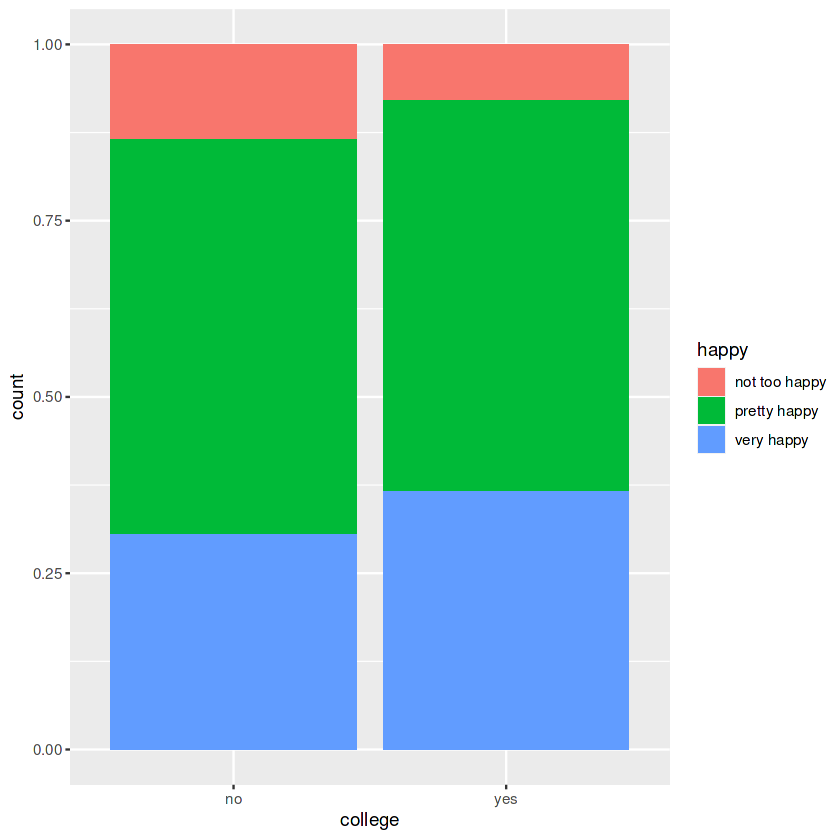

In [82]:
df %>%
  ggplot(aes(college, fill = happy)) + 
  geom_bar(position = "fill")

##### se observa mayor nivel de felicidad en niveles universitario vs los que no

### Felicidad y nivel financiero

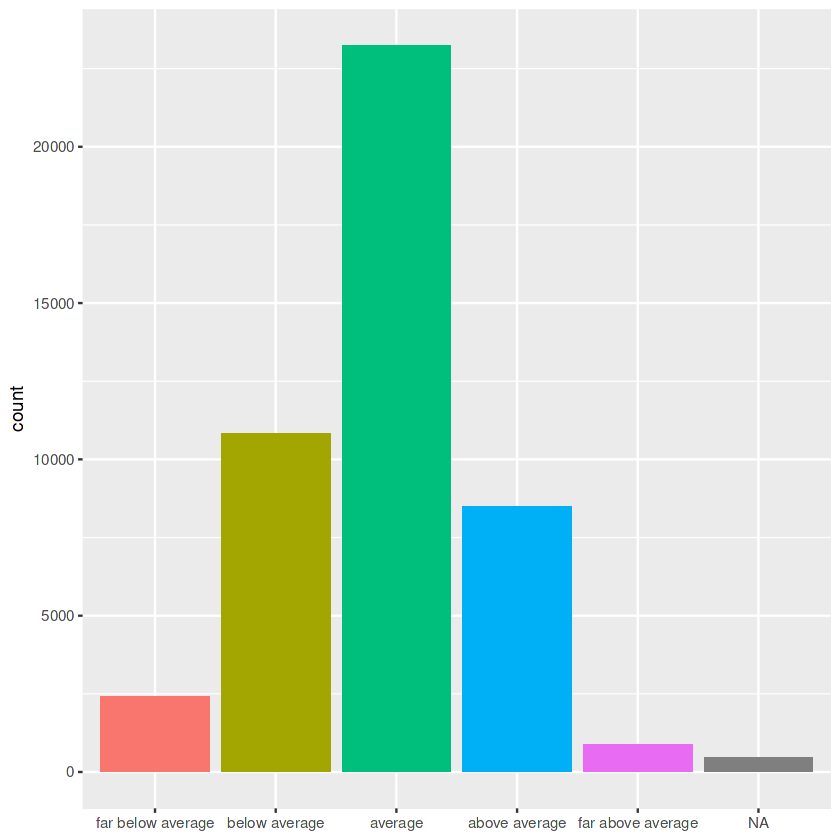

In [83]:
df %>%
  ggplot() + 
  geom_bar(aes(finrela, fill = finrela)) +
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none")

#### Frecuencias de nivel financiero

##### En el grafico se observa que el mayor grupo esta en el nivel promedio, con un leve sesgo hacia la izquierda (niveles por debajo del promedio)

In [84]:
df %>% 
count(finrela) %>%
arrange(desc(n)) %>%
mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))


finrela,n,percentage
<fct>,<int>,<chr>
average,23241,50 %
below average,10824,23 %
above average,8482,18 %
far below average,2408,5 %
far above average,887,2 %
NA,461,1 %


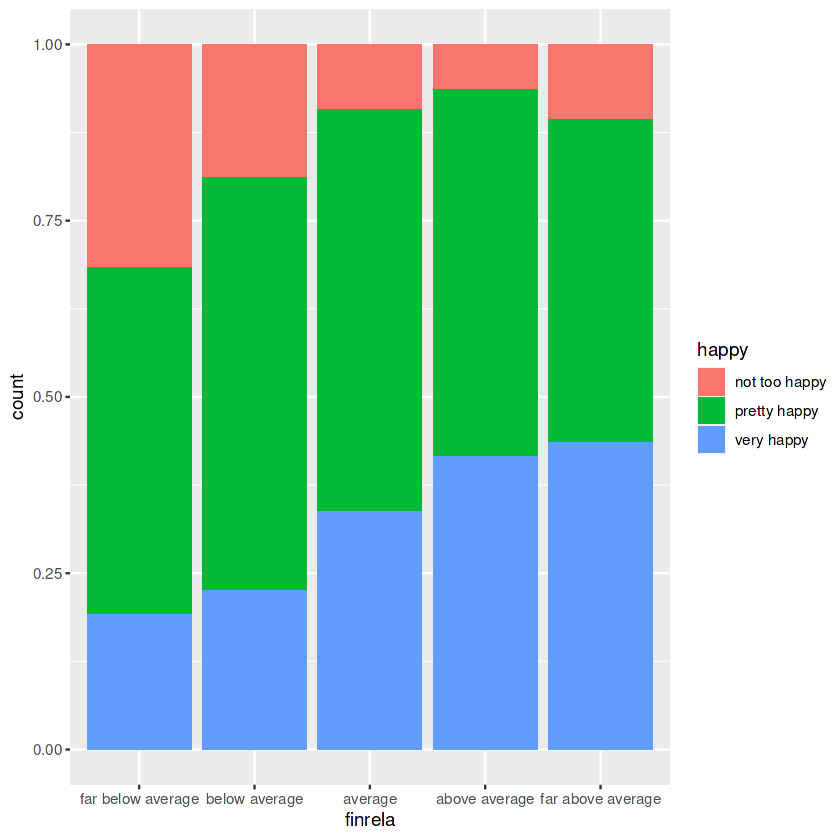

In [85]:
df %>%
  filter(!is.na(finrela)) %>%
  ggplot(aes(finrela, fill = happy)) + 
  geom_bar(position = "fill")

##### En la distribucion de barras apiladas observamos que a mayor nivel economico, mayor felicidad, pero hay mayor proporcion de "no felices" en niveles muy arriba del promedio que en niveles promedio y arriba del promedio.

#### Creamos variable dicotomica abajo del promedio vs el resto

In [86]:
df %<>%
  mutate(
    avg_fin = case_when(
      finrela %in%
        c("far below average",
          "below average") ~
          "no",
      finrela %in%
        c("average",
          "above average",
          "far above average") ~
          "yes",
      finrela == "NA" ~ "NA")
  ) %>%
  print()

# A tibble: 46,303 × 11
   happy  year   age sex   marital degree finrela health married college avg_fin
   <fct> <dbl> <dbl> <fct> <fct>   <fct>  <fct>   <fct>  <fct>   <chr>   <chr>  
 1 not …  1972    23 fema… never … bache… average good   no      yes     yes    
 2 not …  1972    70 male  married lt hi… above … fair   yes     no      yes    
 3 pret…  1972    48 fema… married high … average excel… yes     no      yes    
 4 not …  1972    27 fema… married bache… average good   yes     yes     yes    
 5 pret…  1972    61 fema… married high … above … good   yes     no      yes    
 6 pret…  1972    26 male  never … high … above … good   no      no      yes    
 7 not …  1972    28 male  divorc… high … above … excel… no      no      yes    
 8 not …  1972    27 male  never … bache… average good   no      yes     yes    
 9 pret…  1972    21 fema… never … high … average excel… no      no      yes    
10 pret…  1972    30 fema… married high … below … fair   yes     no      no     
# ℹ 

#### Obtenemos las frecuencias

In [87]:
df %>% 
count(avg_fin) %>% 
arrange(desc(n)) %>%
mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))

avg_fin,n,percentage
<chr>,<int>,<chr>
yes,32610,70 %
no,13232,29 %
NA,461,1 %


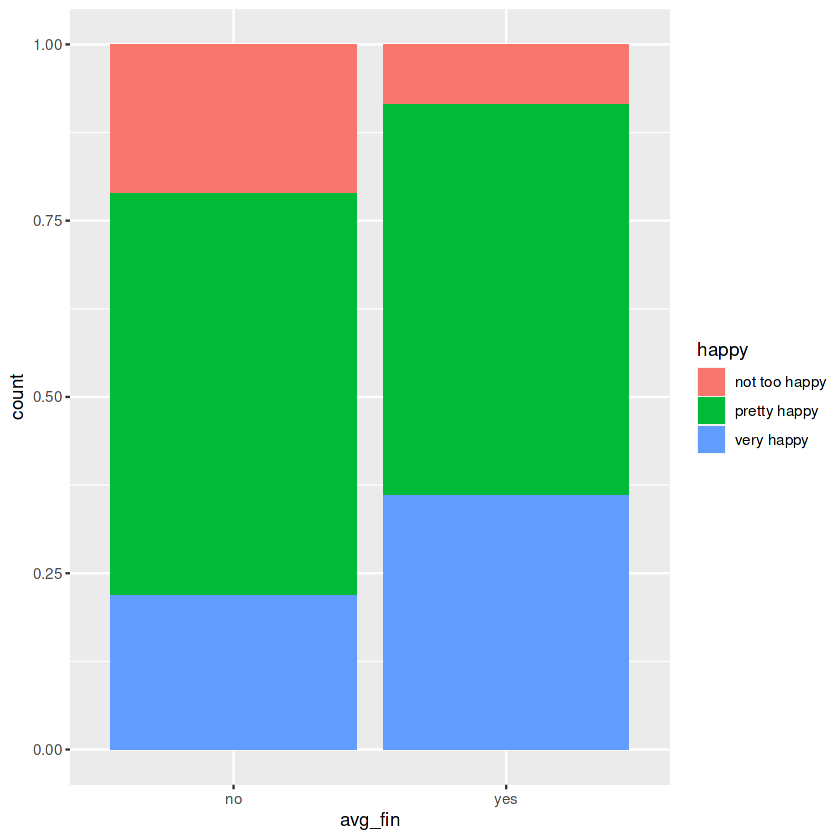

In [88]:
df %>%
  filter(!is.na(avg_fin)) %>%
  ggplot(aes(avg_fin, fill = happy)) + 
  geom_bar(position = "fill")

##### En estos grupos se nota la diferencia entre ambos en muy feliz y no feliz

### Felicidad y salud

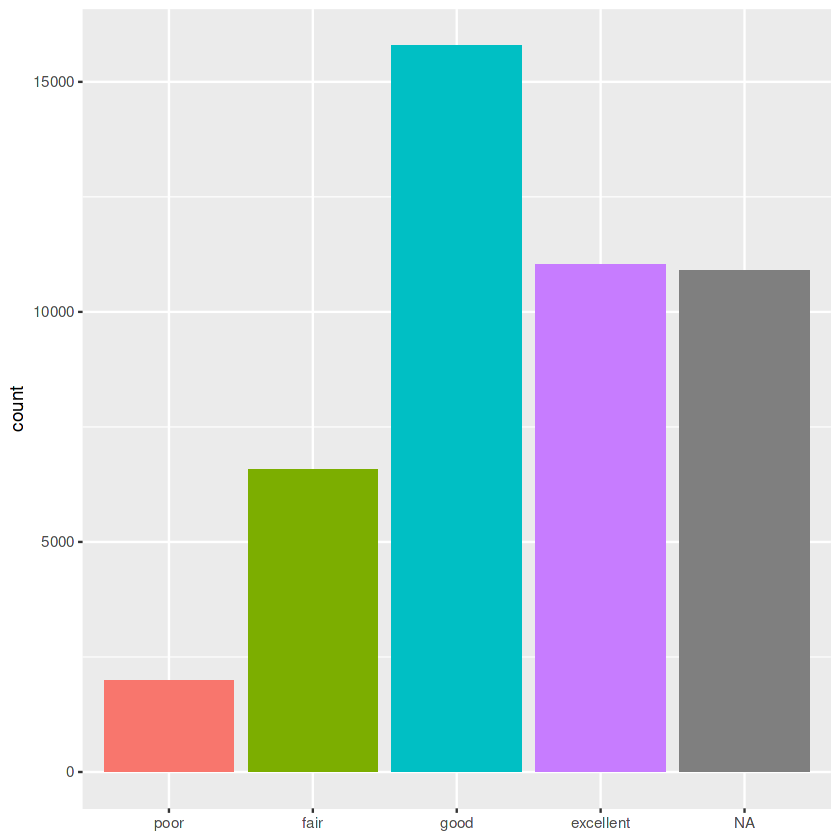

In [89]:
df %>%
  ggplot() + 
  geom_bar(aes(health, fill = health)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

#### Frecuencias de salud

In [90]:
df %>% 
count(health) %>%
arrange(desc(n)) %>%
mutate(percentage = paste(round(n / sum(n) * 100,0)," %"))


health,n,percentage
<fct>,<int>,<chr>
good,15791,34 %
excellent,11022,24 %
NA,10909,24 %
fair,6585,14 %
poor,1996,4 %


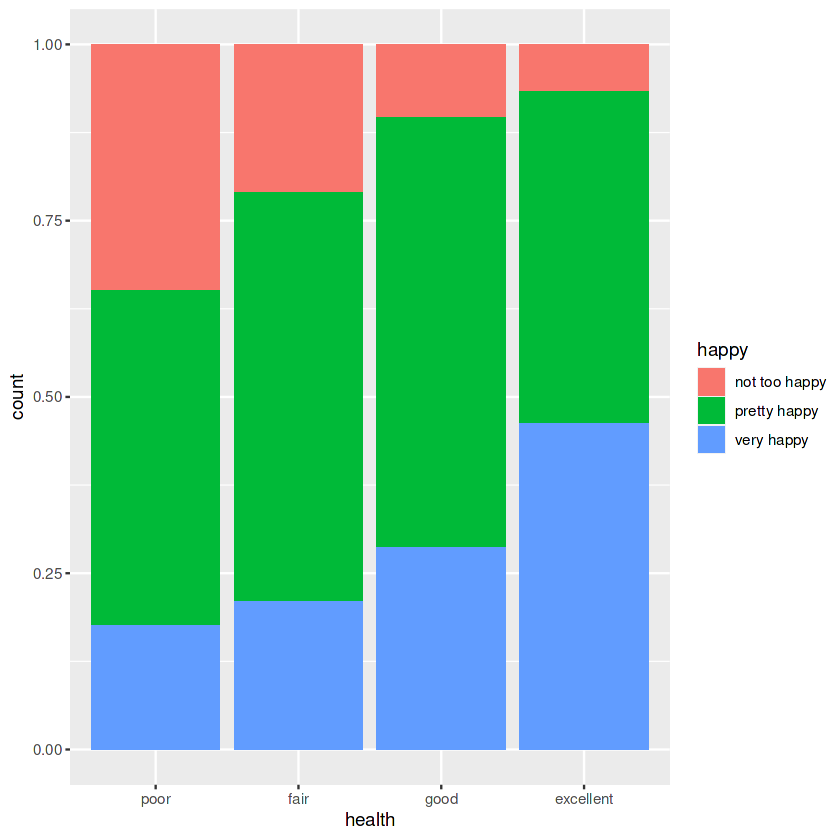

In [91]:
df %>%
  filter(!is.na(health)) %>%
  ggplot(aes(health, fill = happy)) + 
  geom_bar(position = "fill")

##### En este grafico vemos notablemente que a mayor nivel de salud mas felicidad

### Felicidad y años de las encuestas

#### Histograma por años

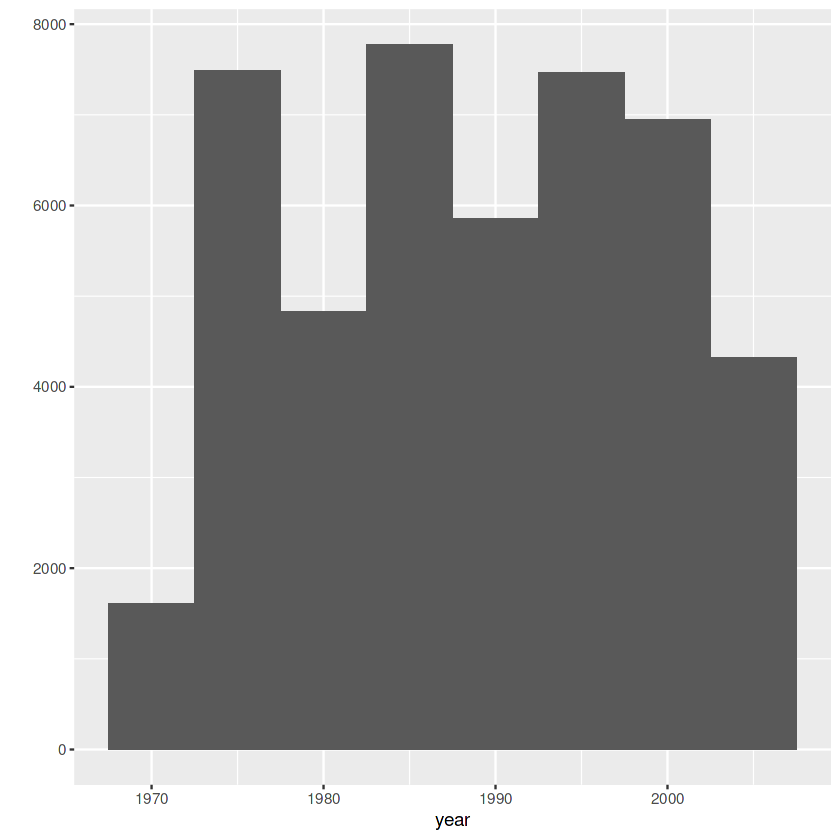

In [92]:
df %>% qplot(year, binwidth = 5, data = .)

#### Resumen de estadisticos descriptivos por año

In [93]:
df %>% select(year) %>% summary()

      year     
 Min.   :1972  
 1st Qu.:1980  
 Median :1988  
 Mean   :1989  
 3rd Qu.:1996  
 Max.   :2006  

#### Graficos de densidad de año por grupo

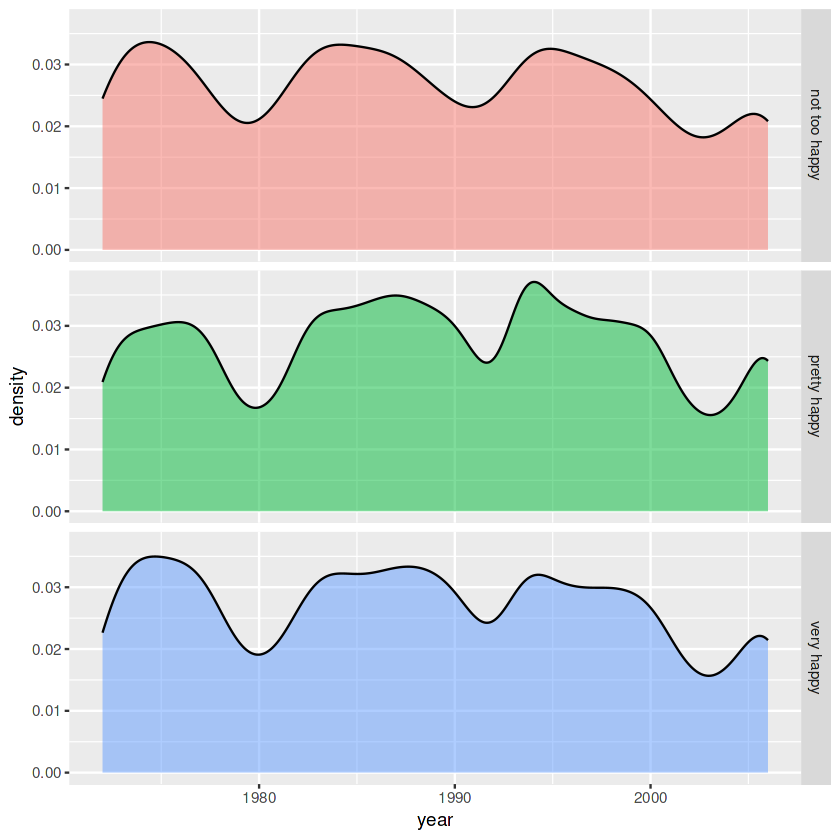

In [94]:
df%>%
  ggplot(aes(x = year, 
    fill = happy)) + 
  geom_density(alpha = 0.5) +
  facet_grid(happy ~ .) +  
  theme(legend.position = "none")  

#### Graficos de cajas de año por grupo

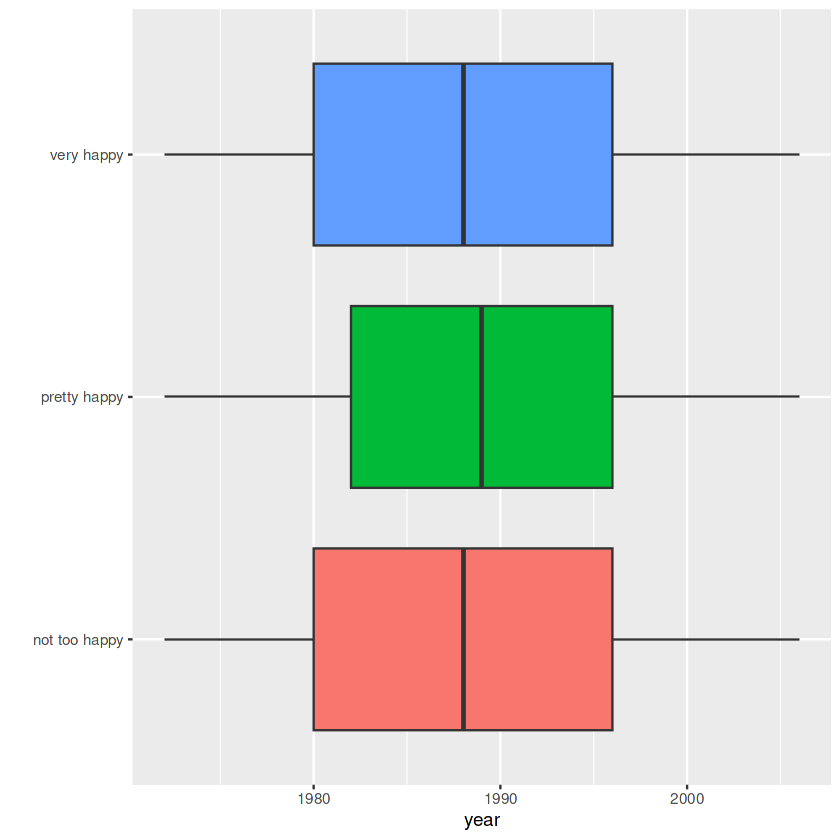

In [95]:
df %>%
  ggplot(aes(x = happy, 
    y = year, 
    fill = happy)) + 
  geom_boxplot() +
  coord_flip() +
  xlab("") +
  theme(legend.position = "none")

##### No se observan diferencias obvias

### Felicidad y edad

#### Histograma de edad

Warning message:
“Removed 150 rows containing non-finite values (`stat_bin()`).”


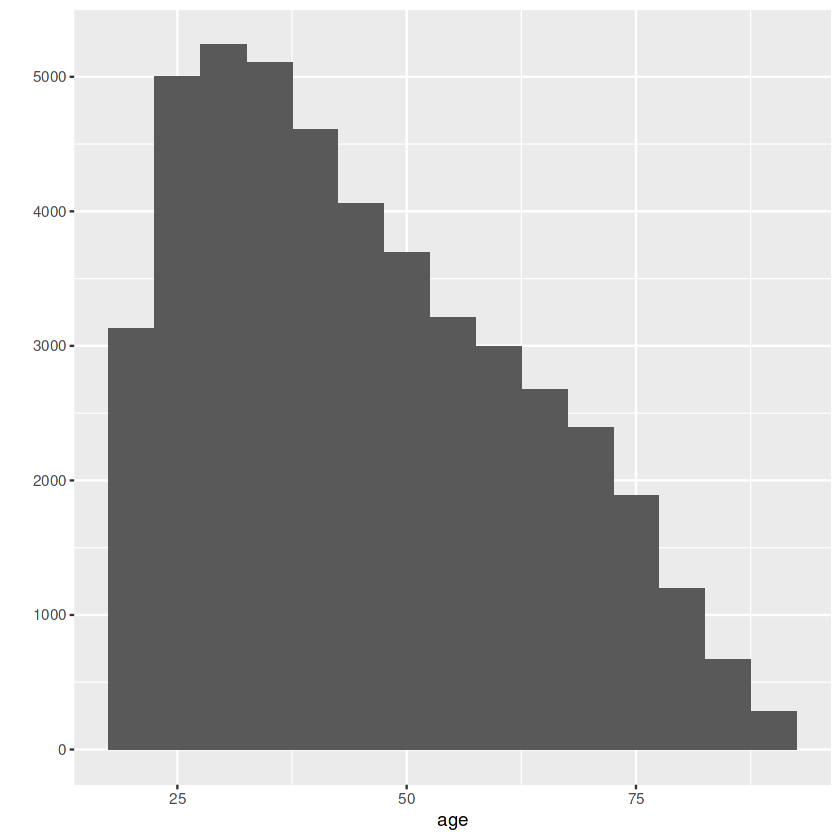

In [96]:
df %>% qplot(age, binwidth = 5, data = .)


#### Descriptivos por edad

In [97]:
df %>% select(age) %>% summary()

      age       
 Min.   :18.00  
 1st Qu.:31.00  
 Median :42.00  
 Mean   :45.33  
 3rd Qu.:58.00  
 Max.   :89.00  
 NA's   :150    

#### Graficos de densidad

Warning message:
“Removed 150 rows containing non-finite values (`stat_density()`).”


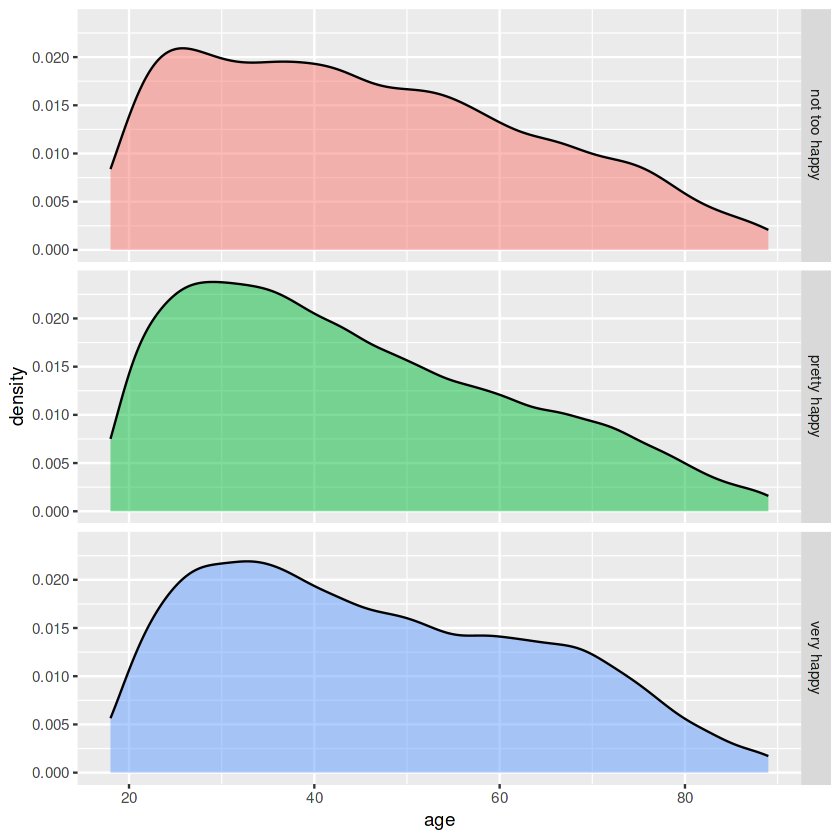

In [98]:
df %>%
  ggplot(aes(x = age, 
    fill = happy)) + 
  geom_density(alpha = 0.5) +
  facet_grid(happy ~ .) +  
  theme(legend.position = "none")  

##### No hay grandes diferencias, salvo en una caida mas pronunciada en "muy feliz" a partir de los 70 años

#### Boxplot de edad por grupo

Warning message:
“Removed 150 rows containing non-finite values (`stat_boxplot()`).”


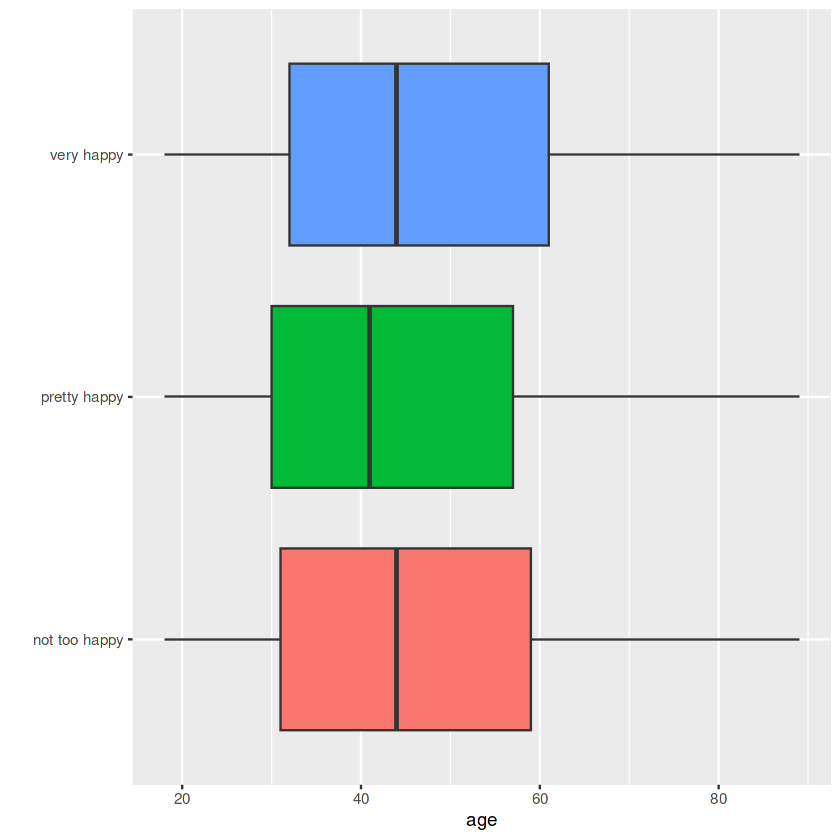

In [99]:
# Boxplots of age by group
df %>%
  ggplot(aes(x = happy, 
    y = age, 
    fill = happy)) + 
  geom_boxplot() +
  coord_flip() +
  xlab("") +
  theme(legend.position = "none")

##### No hay conclusiones obvias en estos graficos

### Felicidad y año de nacimiento

In [100]:
#Agregamos columna año de nacimiento
df %<>%
  mutate(born = year - age)

#### Histograma de año de nacimiento

Warning message:
“Removed 150 rows containing non-finite values (`stat_bin()`).”


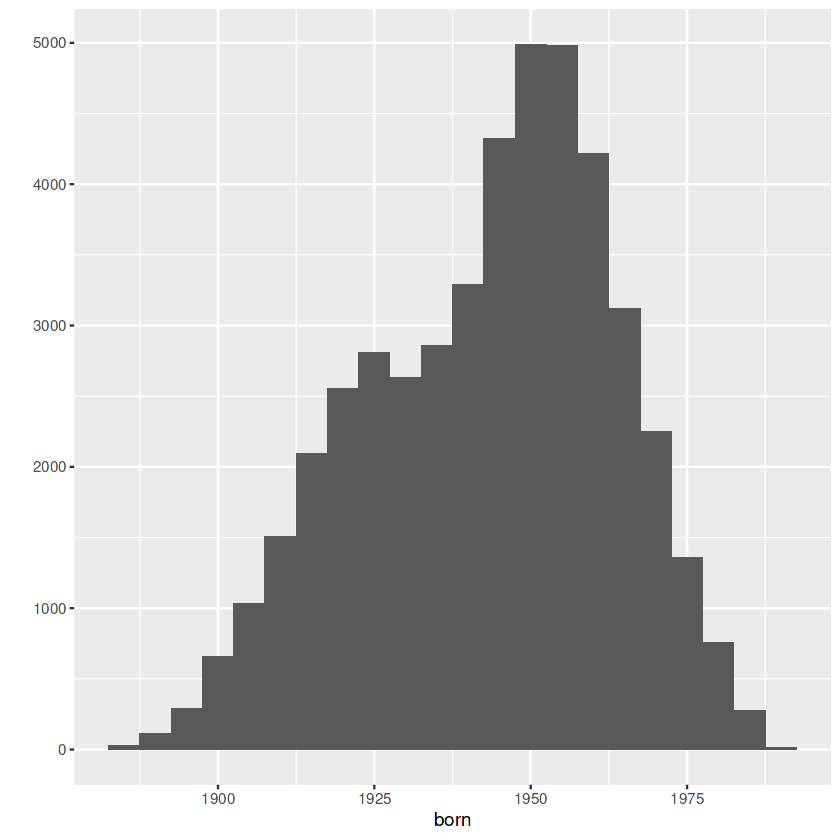

In [101]:
df %>% qplot(born, binwidth = 5, data = .)

#### Descriptivos

In [102]:
df %>% select(born) %>% summary()

      born     
 Min.   :1883  
 1st Qu.:1928  
 Median :1946  
 Mean   :1943  
 3rd Qu.:1958  
 Max.   :1988  
 NA's   :150   

##### la mediana de edad esta dentro del grupo de la generacion silenciosa, previo a los baby boomers

Warning message:
“Removed 150 rows containing non-finite values (`stat_density()`).”


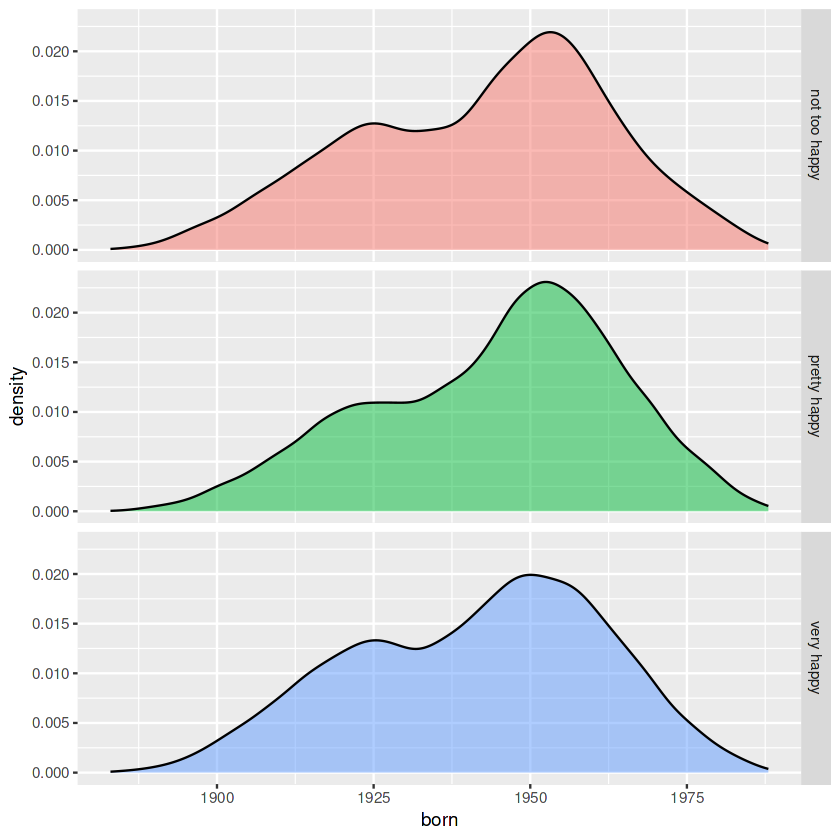

In [103]:
df %>%
  ggplot(aes(x = born, 
    fill = happy)) + 
  geom_density(alpha = 0.5) +
  facet_grid(happy ~ .) +  # facet_grid
  theme(legend.position = "none")  # Turn off legend

##### En los graficos de densidad vemos que se concentra en el grupo dentro de los "baby boomers"
![](https://i.revistapym.com.co/old/2018/06/taxinomia_vanguardia.png?w=931)

#### Grafico de caja

Warning message:
“Removed 150 rows containing non-finite values (`stat_boxplot()`).”


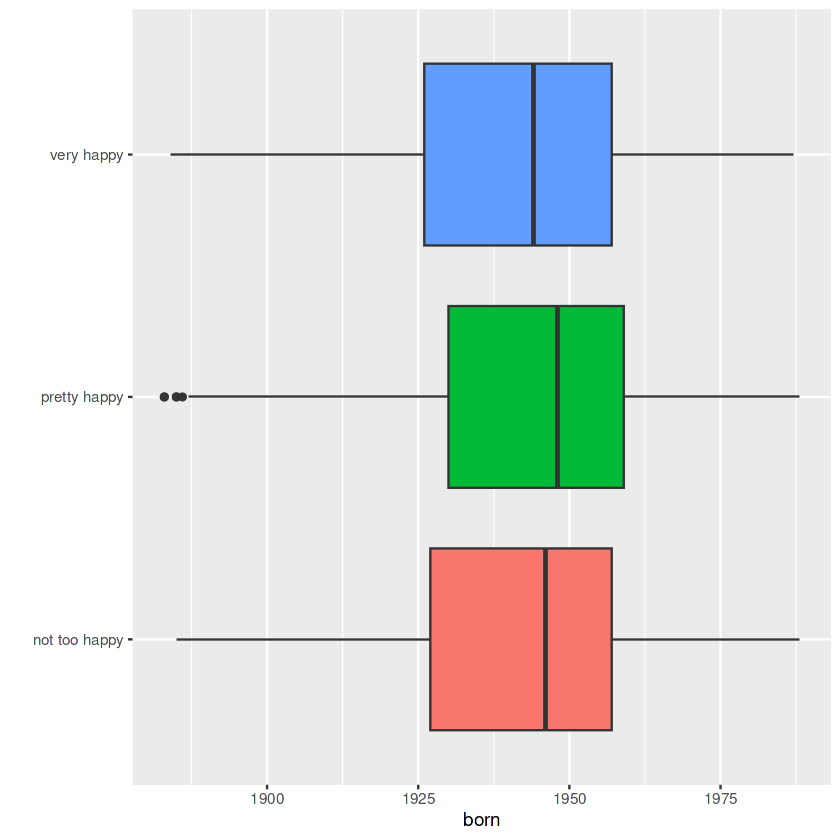

In [104]:
df %>%
  ggplot(aes(x = happy, 
    y = born, 
    fill = happy)) + 
  geom_boxplot() +
  coord_flip() +
  xlab("") +
  theme(legend.position = "none")